<h1>Analysis on Honey Production Trends in U.S</h1>

<h3>Data Collection</h3>

In [3]:
#import the libraries
import pandas as pd

In [4]:
#Define dataframe
data = pd.read_csv('US_honey_dataset.csv')

<h3>Data Cleaning</h3>

In [6]:
#Cleaning dataset, removing unwated rows and columns. Removing the null values and rename the columns if needed.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           1115 non-null   int64  
 1   state                1115 non-null   object 
 2   colonies_number      1115 non-null   int64  
 3   yield_per_colony     1115 non-null   int64  
 4   production           1115 non-null   int64  
 5   stocks               1115 non-null   int64  
 6   average_price        1115 non-null   float64
 7   value_of_production  1115 non-null   int64  
 8   year                 1115 non-null   int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 78.5+ KB


In [7]:
data.isnull().sum()  #Gives the count of null values.

Unnamed: 0             0
state                  0
colonies_number        0
yield_per_colony       0
production             0
stocks                 0
average_price          0
value_of_production    0
year                   0
dtype: int64

In [8]:
data.duplicated().sum()  #Gives the count of duplicate rows in dataset

0

In [9]:
data.drop('Unnamed: 0', axis=1, inplace=True) #Removed the unwanted column.

<h3>Data Aggregation</h3>

In [11]:
#Total production by year
production_by_year = data.groupby('year')['production'].sum().reset_index()
value_production_by_year = data.groupby('year')['value_of_production'].sum().reset_index()

In [12]:
#Average yield per colony by state
YPC_by_state = data.groupby('state')['yield_per_colony'].mean().reset_index().sort_values(by='yield_per_colony',ascending= False).head(5)

In [13]:
#Total colonies by state
colonies_by_state = data.groupby(['state'])['colonies_number'].sum().sort_values(ascending=False).reset_index().head(5)

In [14]:
#Average price of honey over the years
avg_price_honey = data.groupby('year')['average_price'].mean().reset_index()

In [15]:
#Average value of production by state 
average_value_production = data.groupby('state')['value_of_production'].mean().sort_values(ascending=False).reset_index().head(5)

In [16]:
#Stocks over the time
stocks_over_time = data.groupby('year')['stocks'].mean().reset_index().round(2)

In [17]:
#Production vs Average Price over the Years
prod_vs_price = data.groupby('year')[['production','average_price']].mean().reset_index().round(2)

In [18]:
#Top state by production
state_by_production = data.groupby('state')['production'].sum().sort_values(ascending=False).reset_index().head(5)

In [19]:
#Colony count growth rate over the years
colony_growth = data.groupby('year')['colonies_number'].sum().reset_index()
colony_growth['growth rate'] = colony_growth['colonies_number'].pct_change().fillna(0)*100

<h3>Data Visualization</h3>

In [21]:
#import the libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

<h4>Total Production over the Years</h4>

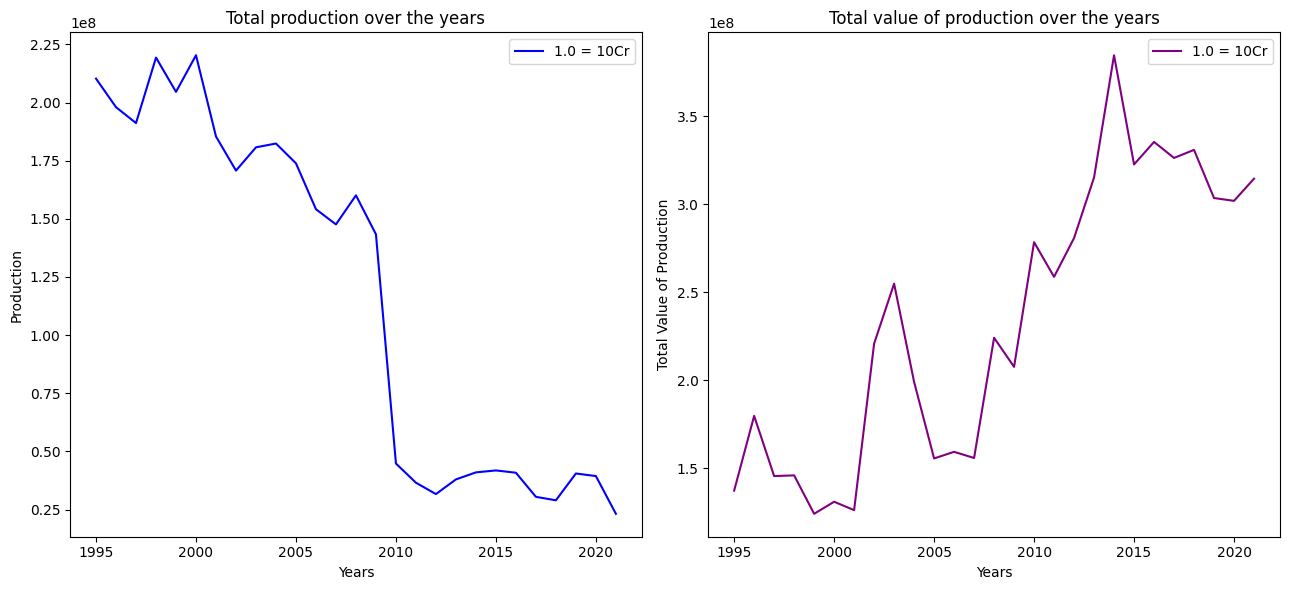

In [23]:
fig, axis = plt.subplots(1,2, figsize=(13,6))  #created subplot to add two visualizations

sns.lineplot(x='year', y='production', data=production_by_year, ax=axis[0], color='blue', label='1.0 = 10Cr')
axis[0].set_title('Total production over the years')
axis[0].set_xlabel('Years')
axis[0].set_ylabel('Production')

sns.lineplot(x='year', y='value_of_production', data=value_production_by_year, ax=axis[1], color='purple', label='1.0 = 10Cr')
axis[1].set_title('Total value of production over the years')
axis[1].set_xlabel('Years')
axis[1].set_ylabel('Total Value of Production')

plt.tight_layout()
plt.show()

<h4>Average Yield per Colony by State</h4>

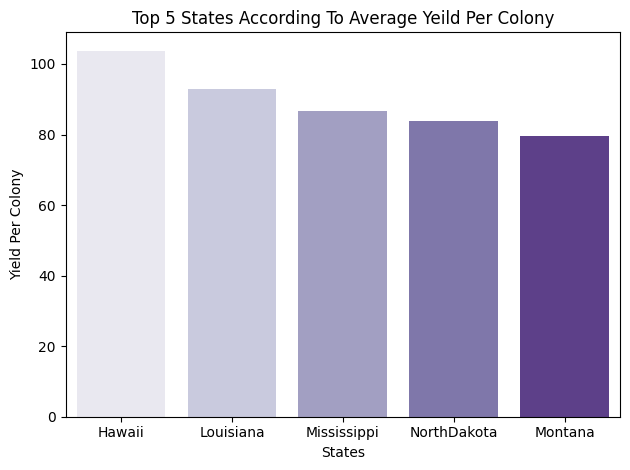

In [25]:
sns.barplot(data=YPC_by_state, x='state', y='yield_per_colony', palette='Purples', hue='state') #Defined bar plot
plt.title('Top 5 States According To Average Yeild Per Colony')
plt.xlabel('States')
plt.ylabel('Yield Per Colony')

plt.tight_layout()
plt.show()

<h4>Total Colonies by State</h4>

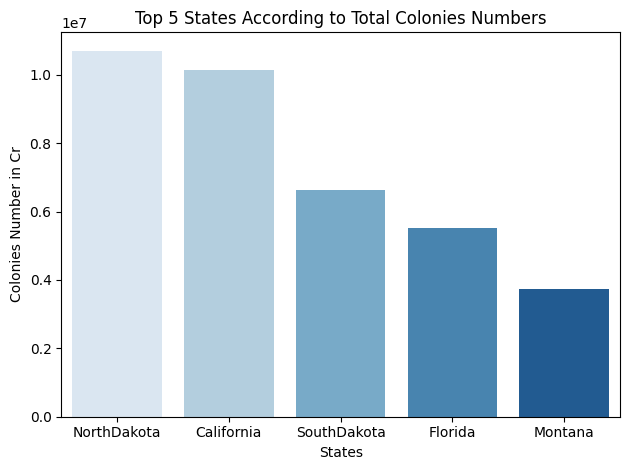

In [27]:
sns.barplot(data=colonies_by_state, x='state', y='colonies_number', hue='state', palette='Blues') #Defined barplot
plt.title('Top 5 States According to Total Colonies Numbers')
plt.xlabel('States')
plt.ylabel('Colonies Number in Cr')

plt.tight_layout()
plt.show()

<h4>Average Price and Stocks over the Years</h4>

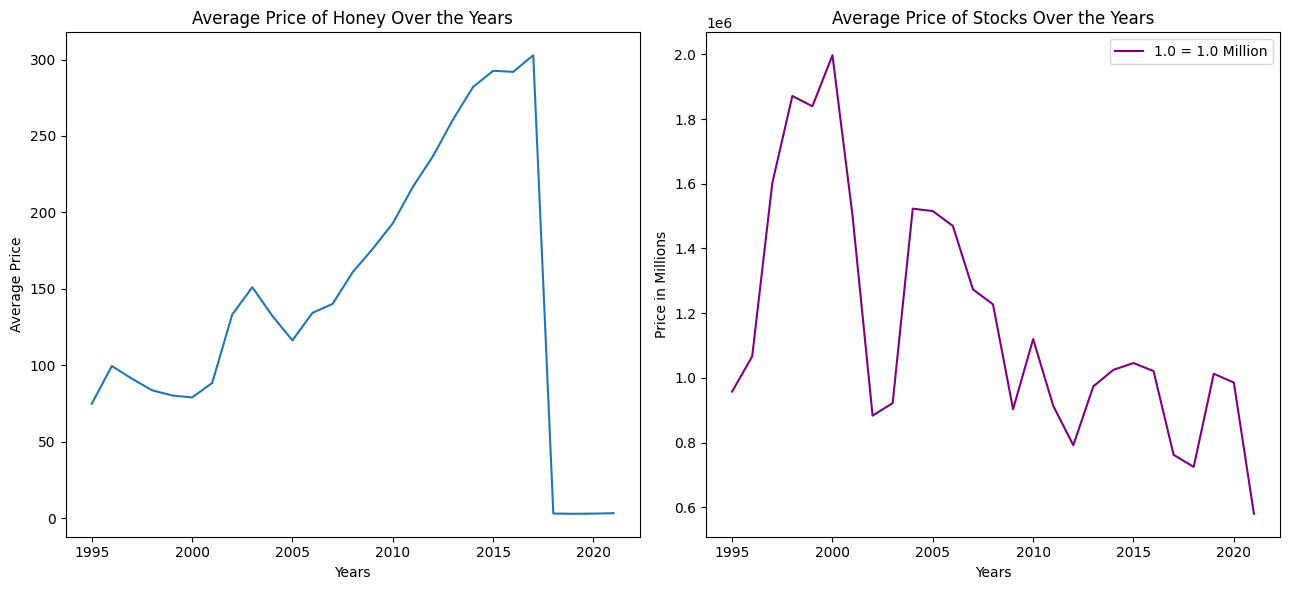

In [29]:
fig, axis = plt.subplots(1,2, figsize=(13,6))    #Defined the sublpots to display two visualizations in single frame
sns.lineplot(data=avg_price_honey, x='year', y='average_price', ax=axis[0])
axis[0].set_title('Average Price of Honey Over the Years')
axis[0].set_xlabel('Years')
axis[0].set_ylabel('Average Price')

sns.lineplot(data=stocks_over_time, x='year', y='stocks', ax=axis[1], color='purple', label='1.0 = 1.0 Million')
axis[1].set_title('Average Price of Stocks Over the Years')
axis[1].set_xlabel('Years')
axis[1].set_ylabel('Price in Millions')

plt.tight_layout()
plt.show()

<h4>Top States by Production and Value of Production</h4>

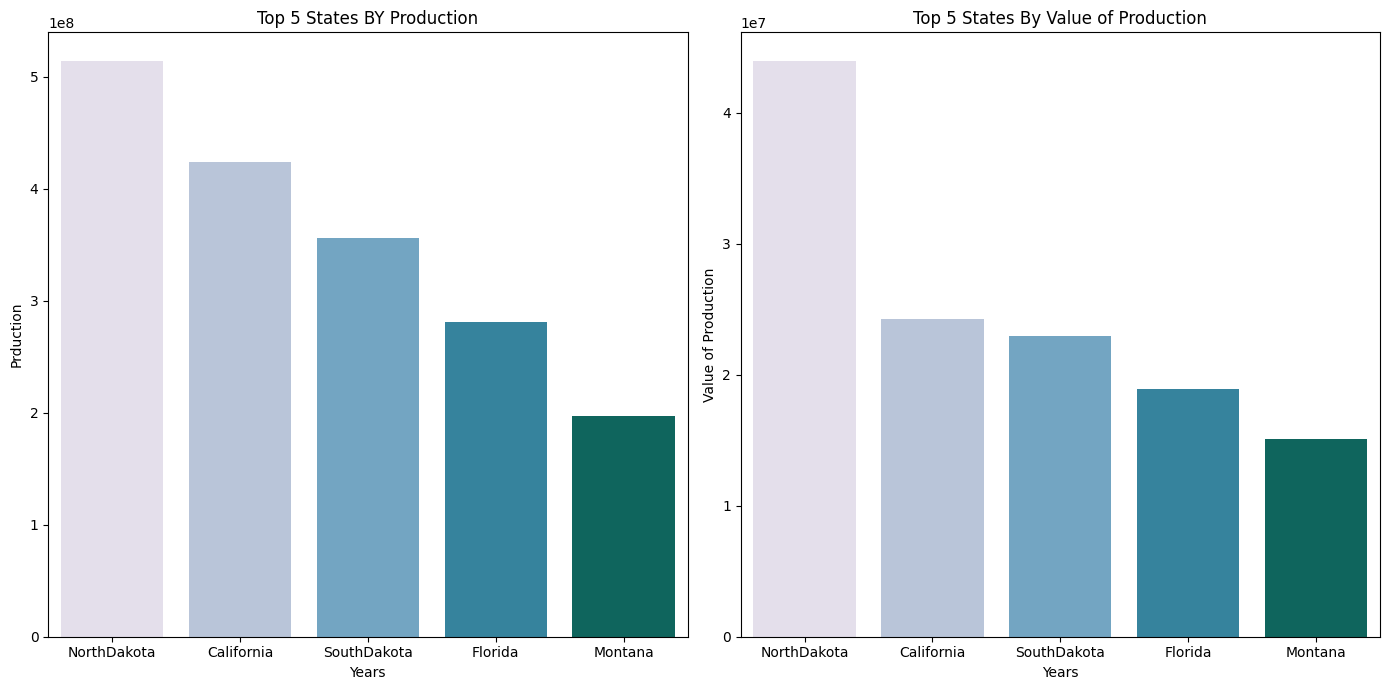

In [31]:
fig, axis = plt.subplots(1,2,figsize=(14,7))   #Defined the sublpots to display two visualizations in single frame
sns.barplot(data=state_by_production , x='state', y='production', ax= axis[0], palette='PuBuGn', hue='state')
axis[0].set_title('Top 5 States BY Production')
axis[0].set_xlabel('Years')
axis[0].set_ylabel('Prduction')

sns.barplot(data=average_value_production, x='state', y='value_of_production',ax= axis[1], palette='PuBuGn', hue='state')
axis[1].set_title('Top 5 States By Value of Production')
axis[1].set_xlabel('Years')
axis[1].set_ylabel('Value of Production')

plt.tight_layout()
plt.show()

<h4>Production vs Average Price</h4>

Text(0, 0.5, 'Average Price')

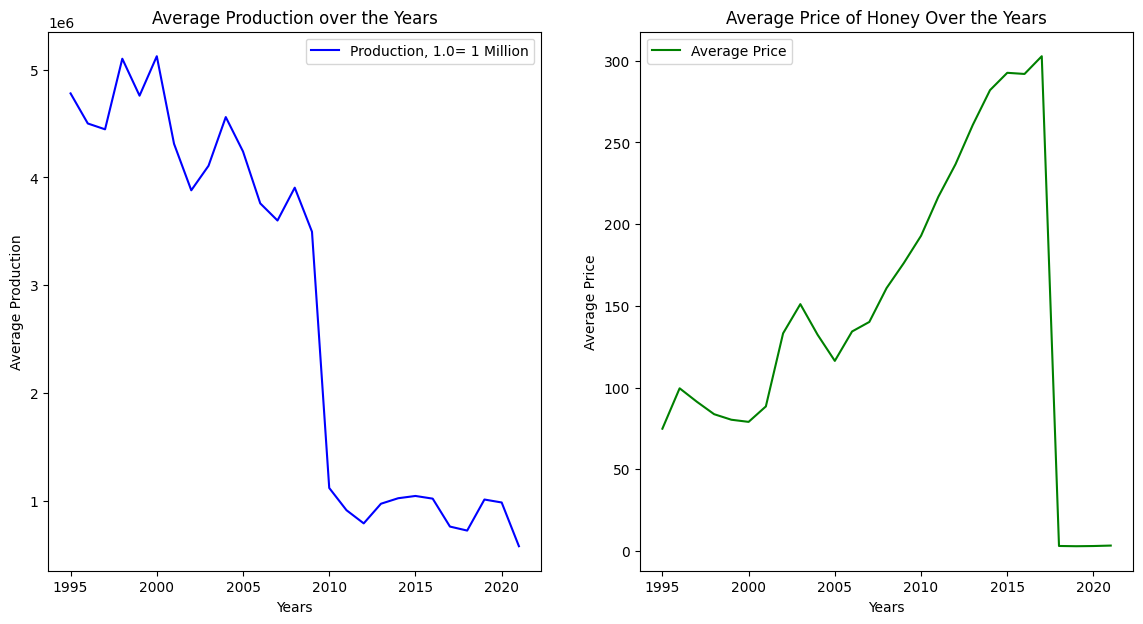

In [33]:
fig, axis = plt.subplots(1,2,figsize=(14,7)) #Defined the sublpots to display two visualizations in single frame
sns.lineplot(data=prod_vs_price, x='year',y='production', label='Production, 1.0= 1 Million', color='blue', ax=axis[0])
axis[0].set_title('Average Production over the Years')
axis[0].set_xlabel('Years')
axis[0].set_ylabel('Average Production')

sns.lineplot(data=prod_vs_price, x='year',y='average_price', label='Average Price', color='green', ax=axis[1])
axis[1].set_title('Average Price of Honey Over the Years')
axis[1].set_xlabel('Years')
axis[1].set_ylabel('Average Price')

<h4>Colony Count Growth Rate</h4>

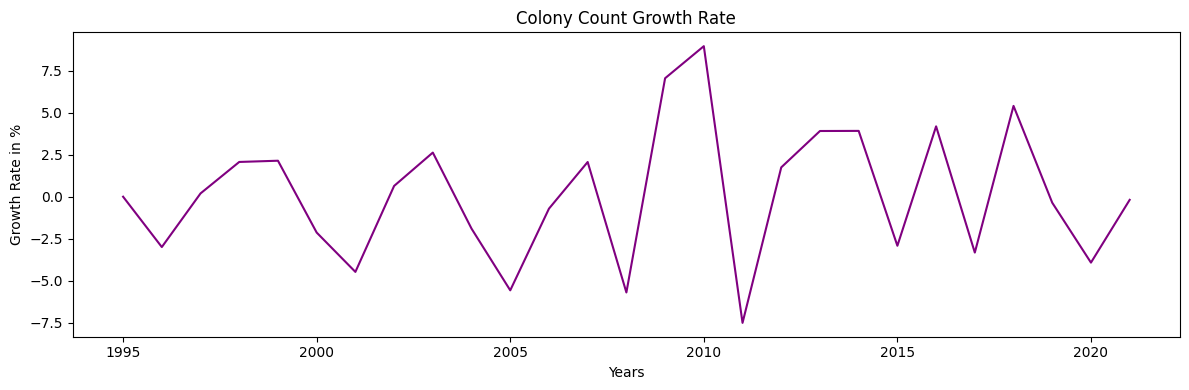

In [35]:
plt.figure(figsize=(12,4))  #Defined the size of chart
sns.lineplot(data=colony_growth, x='year', y='growth rate', color='purple')
plt.title('Colony Count Growth Rate')
plt.xlabel('Years')
plt.ylabel('Growth Rate in %')
plt.tight_layout()
plt.show()

<H4>Conclusion</H4>
<p>
<li>North Dakota produced the highest amount of honey in terms of production as well as value of production, followed by California and South Dakota</li>

<li>We can see increasing trend in average price till 2018, from 2018 there's sharp frop in average price
In 2010, there was highest growth in the colony count in the history with Growth Rate of above 7.5%</li>

<li>We can see downwards trend in stocks and average production over the years
Year 2000 is the best year for production and 2016 is the best year for average honey price.</li>

North Dakota is the best performing state in total production, average production, number of colonies as well as value of production.It is overall best performing state
</p>